## Simple Linear regression

#### load libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### In general flow of ML:
- load data
- perform some EDA
- Preprocessing
- if we have one dataset : separate X(input) and y(Output)
- Call the algorithm/Create an object of an algo.
- Perform Model Training
- Perform Model Testing
- Check performance using some accuracy measures
- if accuracy is nt good then find out the reason
- or try some hyeperparamter tuning

In [2]:
df = pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


#### lets check relation between input and output

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

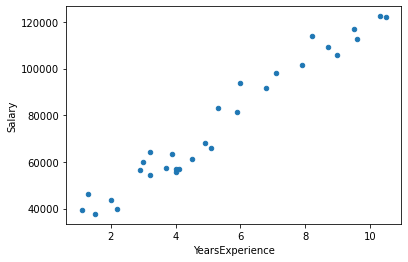

In [3]:
# 1 input(YearsofExp) + 1 Output(Salary)
df.plot.scatter(x='YearsExperience', y='Salary')

In [4]:
df.corr().style.background_gradient('Blues')

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


#### in ML: input must be in 2D

In [5]:
# Separate X and y
X = df[['YearsExperience']]
X[:2]

,YearsExperience
0,1.1
1,1.3


In [6]:
y = df.Salary
y[:2]

0    39343.0
1    46205.0
Name: Salary, dtype: float64

### for ML, we use sklearn library also known as Sci-kit learn

#### Call the algorithm / Create an object of an algorithm.

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
model = LinearRegression()
model

LinearRegression()

#### Perform Model Training:
- fit() method is used to perform training of an algorithm.

In [9]:
model.fit(X,y)

LinearRegression()

#### Perform Model Testing:
- to test/evaluate model use predict() method

In [10]:
model.predict([[1.1]])

C:\Users\chava\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36187.15875227])

In [11]:
df.sample(5)

,YearsExperience,Salary
4,2.2,39891.0
28,10.3,122391.0
17,5.3,83088.0
14,4.5,61111.0
20,6.8,91738.0


In [12]:
model.predict([[3.2],[8.2],[4.9],[9.6],[5.9]])

C:\Users\chava\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 56032.07962732, 103281.8912346 ,  72097.0155738 , 116511.83848464,
        81546.97789525])

In [13]:
X.min(),X.max()

(YearsExperience    1.1
 dtype: float64,
 YearsExperience    10.5
 dtype: float64)

#### beyond min and max u can predict lets check salary for Fresher

In [14]:
model.predict([[0]])

C:\Users\chava\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([25792.20019867])

In [15]:
# if a person with exp 16 yrs
model.predict([[16]])

C:\Users\chava\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([176991.59734195])

In [16]:
import time
print('Welcome to salary Calculator....')
time.sleep(2)
exp = float(input('Enter your Experience in yrs: '))
sal = round(float(model.predict([[exp]])),2)
print('For experience',exp,'yrs','your predicted salary is Rs.',sal)

Welcome to salary Calculator....
Enter your Experience in yrs: 1
For experience 1.0 yrs your predicted salary is Rs. 35242.16


C:\Users\chava\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [17]:
round(float(model.predict([[exp]])),2)

C:\Users\chava\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


35242.16

In [18]:
test = df.sample(10)
test[:3]

,YearsExperience,Salary
11,4.0,55794.0
1,1.3,46205.0
22,7.9,101302.0


In [19]:
test_input = test[['YearsExperience']]
test_input

,YearsExperience
11,4.0
1,1.3
22,7.9
12,4.0
17,5.3
7,3.2
24,8.7
10,3.9
13,4.1
2,1.5


In [20]:
# predict on above input
predicted = model.predict(test_input)
predicted

array([ 63592.04948449,  38077.15121656, 100446.90253816,  63592.04948449,
        75877.00050238,  56032.07962732, 108006.87239533,  62647.05325234,
        64537.04571663,  39967.14368085])

#### Now implement 80-20 strategy on df

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_test, X_train, y_test, y_train = train_test_split(X,y,test_size=.2,random_state=42)

In [23]:
y_pred = model.predict(X_test)
y_pred

array([123126.81210966, 108006.87239533,  63592.04948449,  36187.15875227,
        46582.11730587,  73987.00803809,  53197.09093089,  64537.04571663,
        63592.04948449, 100446.90253816,  38077.15121656,  39967.14368085,
       110841.86109176,  44692.12484158,  92886.932681  , 115566.84225249,
        81546.97789525, 125016.80457395,  90051.94398456,  56032.07962732,
        62647.05325234,  68317.03064522,  82491.9741274 ,  54142.08716303])

#### training accuraccy

In [24]:
model.score(X_train,y_train)*100

90.90578530656059

#### testing accuraccy

In [25]:
model.score(X_test,y_test)*100

96.4051846518877

### y_pred = mx + c

#### m: slope

In [26]:
m = model.coef_
m

array([9449.96232146])

#### c: intercept

In [27]:
c = model.intercept_
c

25792.20019866871

In [28]:
m*0 + c

array([25792.20019867])

In [29]:
# 12 yrs of exp
m*12 + c

array([139191.74805613])

In [30]:
model.predict([[12]])

C:\Users\chava\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([139191.74805613])

### Calculate Error

#### error = actual_value - predicted_value

In [31]:
test['predicted'] = predicted
test

,YearsExperience,Salary,predicted
11,4.0,55794.0,63592.049484
1,1.3,46205.0,38077.151217
22,7.9,101302.0,100446.902538
12,4.0,56957.0,63592.049484
17,5.3,83088.0,75877.000502
7,3.2,54445.0,56032.079627
24,8.7,109431.0,108006.872395
10,3.9,63218.0,62647.053252
13,4.1,57081.0,64537.045717
2,1.5,37731.0,39967.143681


#### change column names as input actual predicted

In [32]:
test.columns = ['input','actual','predicted']

In [33]:
# calculate error = act-pred
# add a new column error
test['error'] = round((test.actual - test.predicted),2)

In [34]:
test

,input,actual,predicted,error
11,4.0,55794.0,63592.049484,-7798.05
1,1.3,46205.0,38077.151217,8127.85
22,7.9,101302.0,100446.902538,855.10
12,4.0,56957.0,63592.049484,-6635.05
17,5.3,83088.0,75877.000502,7211.00
7,3.2,54445.0,56032.079627,-1587.08
24,8.7,109431.0,108006.872395,1424.13
10,3.9,63218.0,62647.053252,570.95
13,4.1,57081.0,64537.045717,-7456.05
2,1.5,37731.0,39967.143681,-2236.14


In [35]:
y1 = 112635.0

#### mean 

In [36]:
y_bar = test.actual.mean()
y_hat = 116511.838485

#### r2 = SSR/SST

In [37]:
(y_hat - y_bar)/(y1-y_bar)

1.0840784060004598

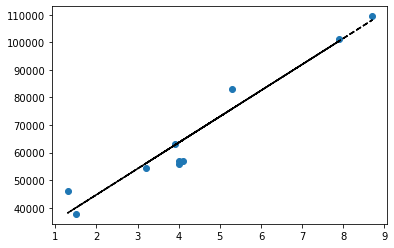

In [38]:
plt.scatter(test.input,test.actual)
plt.plot(test.input,test.predicted,'--k')

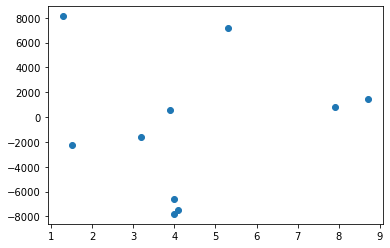

In [39]:
plt.scatter(test.input,test.error)

### Check performance using some accuracy measures

In [40]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

#### MAE

In [41]:
mean_absolute_error(test.actual,test.predicted)

4390.138808901275

In [42]:
test.error.mean()

-752.3340000000001

#### MSE

In [43]:
mean_squared_error(test.actual,test.predicted)

28909098.635099895

#### R2 score/R square/Coeficient of determination

In [44]:
r2_score(test.actual,test.predicted)

0.9424058111758427

#### check Data accuracy

In [45]:
model.score(X,y)*100

95.69566641435085

#### RMSE

In [46]:
import numpy as np
np.sqrt(mean_squared_error(test.actual,test.predicted))

5376.718203058432